In [1]:
import pandas as pd
import numpy as np
import sklearn as skl

In [2]:
ds=pd.read_csv('2020-XTern-DS.csv')
ds.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [3]:
dfi=pd.DataFrame(ds)
df=dfi
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes


In [4]:
df.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost      object
Minimum_Order     object
Rating            object
Votes             object
Reviews           object
Cook_Time         object
dtype: object

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Cuisines_En= le.fit_transform(df['Cuisines'])
Cuisines_map = dict(zip(le.classes_, le.transform(le.classes_)))
Cuisines_map

{'Afghan, BBQ, Biryani, Seafood': 0,
 'American': 1,
 'American, Beverages, Burger, Cafe, Coffee, Desserts, Fast Food, Pizza': 2,
 'American, Fast Food': 3,
 'American, Italian, Cafe, Salad': 4,
 'American, Italian, Continental, Burger, Sandwich': 5,
 'American, North Indian, Finger Food': 6,
 'Andhra, Biryani': 7,
 'Andhra, Biryani, Chinese': 8,
 'Andhra, Chinese, Biryani': 9,
 'Andhra, Hyderabadi, Biryani, South Indian, North Indian, Rolls, Mughlai': 10,
 'Andhra, North Indian, Chinese': 11,
 'Andhra, North Indian, Chinese, Seafood': 12,
 'Andhra, South Indian, North Indian, Biryani, Chinese, Beverages': 13,
 'Arabian': 14,
 'Arabian, Biryani': 15,
 'Arabian, Biryani, Burger, Sandwich, Desserts': 16,
 'Arabian, Chinese, Continental': 17,
 'Arabian, Lebanese, Mughlai, North Indian, BBQ, Chinese': 18,
 'Arabian, North Indian, Biryani, Chinese, Seafood': 19,
 'Arabian, North Indian, Biryani, Mughlai, BBQ, Salad, Fast Food, Desserts': 20,
 'Arabian, North Indian, Mughlai, Chinese, Bevera

In [6]:
import locale
#convert currency to number by deleting signs
locale.setlocale(locale.LC_ALL,'')
df['Average_Cost']=df.Average_Cost.map(lambda x: locale.atof(x.strip('$')))
df['Minimum_Order']=df.Minimum_Order.map(lambda x: locale.atof(x.strip('$')))
df['Cook_Time']=df.Cook_Time.map(lambda x: locale.atof(x.strip(' minutes')))

In [7]:
df.dtypes
mean_ave=round(np.mean(df['Average_Cost']),1)
mean_min=round(np.mean(df['Minimum_Order']),1)
mean_cook=int(np.mean(df['Cook_Time']))
print(mean_ave,mean_min,mean_cook)

20.1 53.3 36


In [8]:
df.isnull().sum()

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

In [9]:
df.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost     float64
Minimum_Order    float64
Rating            object
Votes             object
Reviews           object
Cook_Time        float64
dtype: object

In [10]:
import re
df['Rating']=df['Rating'].replace('NEW',np.nan)
df['Rating']=df['Rating'].replace('Opening Soon',np.nan)
df['Rating']=df['Rating'].replace('-',np.nan)
df['Votes']=df['Votes'].replace('-',np.nan)
df['Reviews']=df['Reviews'].replace('-',np.nan)


In [11]:
mid=df.dropna()
mid
mid[['Reviews']]=mid[['Reviews']].astype(int)
mid[['Votes']]=mid[['Votes']].astype(int)
mid[['Rating']]=mid[['Rating']].astype(float)
mean_r=round(mid['Rating'].mean(),1)
mean_re=int(mid['Reviews'].mean())
mean_v=int(mid['Votes'].mean())

c:\program files\python37\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
#fill new and coming soon with the mean of the column
df[['Rating']] = df[['Rating']].fillna(value=mean_r)
df[['Reviews']] = df[['Reviews']].fillna(value=mean_re)
df[['Votes']] = df[['Votes']].fillna(value=mean_v)
df['Reviews']=df['Reviews'].astype(int)
df['Votes']=df['Votes'].astype(int)
df['Rating']=df['Rating'].astype(float)
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12,4,30.0
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11,4,30.0
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99,30,65.0
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176,95,30.0
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521,235,65.0
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.0,0.0,3.6,260,127,30.0
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",40.0,99.0,4.1,118,91,30.0
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",10.0,50.0,3.6,260,127,30.0
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",10.0,50.0,3.6,260,127,30.0


In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
position=df.loc[:,['Restaurant','Longitude','Latitude']]
position

,Restaurant,Longitude,Latitude
0,ID_6321,-85.837372,39.262605
1,ID_2882,-85.740581,39.775933
2,ID_1595,-85.123779,39.253436
3,ID_5929,-85.332050,39.029841
4,ID_6123,-85.517407,39.882284
...,...,...,...
2014,ID_4366,-85.189212,39.624978
2015,ID_319,-85.503020,39.133719
2016,ID_3104,-85.950894,39.662987
2017,ID_4396,-85.662768,39.301765


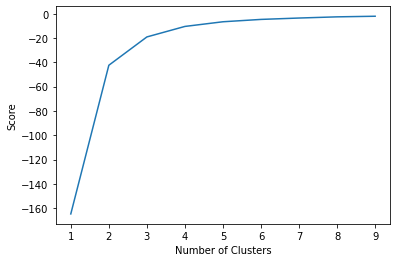

In [15]:
k_num = range(1,10)
k_mean = [KMeans(n_clusters=i) for i in k_num]
y_axis = position[['Latitude']]
x_axis = position[['Longitude']]
score = [k_mean[i].fit(y_axis).score(y_axis) for i in range(len(k_mean))]
plt.plot(k_num, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(position[position.columns[1:3]]) 
position['cluster_label'] = kmeans.fit_predict(position[position.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(position[position.columns[1:3]])

In [17]:
#pickup points
centers

array([[-85.67357407,  39.22841794],
       [-85.19748642,  39.5213233 ],
       [-85.70781007,  39.75884229]])

In [18]:
position.head()

,Restaurant,Longitude,Latitude,cluster_label
0,ID_6321,-85.837372,39.262605,0
1,ID_2882,-85.740581,39.775933,2
2,ID_1595,-85.123779,39.253436,1
3,ID_5929,-85.332050,39.029841,0
4,ID_6123,-85.517407,39.882284,2


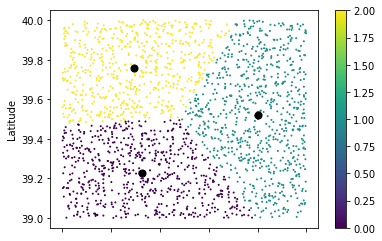

In [19]:
position.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=1, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1)

Text(0.5, 1.0, 'Rating vs Cost')

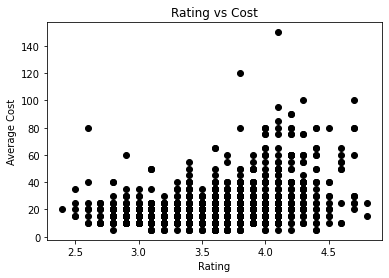

In [20]:
# Customer Rating vs Avrage Cost
plt.plot(df['Rating'],df['Average_Cost'],'o',color='black')
plt.xlabel('Rating')
plt.ylabel('Average Cost')
plt.title('Rating vs Cost')

In [21]:
med=df
estimate=med.loc[:,['Cuisines','Cook_Time']]
estimate

,Cuisines,Cook_Time
0,"Fast Food, Rolls, Burger, Salad, Wraps",30.0
1,"Ice Cream, Desserts",30.0
2,"Italian, Street Food, Fast Food",65.0
3,"Mughlai, North Indian, Chinese",30.0
4,"Cafe, Beverages",65.0
...,...,...
2014,"North Indian, Pizza, Burger, Continental",30.0
2015,"Awadhi, Bihari",30.0
2016,"Fast Food, Beverages",30.0
2017,"Kebab, Fast Food",30.0


In [23]:
aggregation_functions = {'Cook_Time': 'mean'}
estimate_new = estimate.groupby(estimate['Cuisines']).aggregate(aggregation_functions)

In [24]:
#estimate time by cuisines
estimate_new

,Cook_Time
Cuisines,
"Afghan, BBQ, Biryani, Seafood",30.000000
American,30.000000
"American, Beverages, Burger, Cafe, Coffee, Desserts, Fast Food, Pizza",30.000000
"American, Fast Food",37.500000
"American, Italian, Cafe, Salad",45.000000
...,...
"Tibetan, Chinese, Momos",45.000000
"Tibetan, Momos",30.000000
"Wraps, Fast Food",30.000000
